In [1]:
# "Panel data analysis" = pandas (loosely translated)
import pandas as pd

# Base plotting library necessary for saving figures
import matplotlib.pyplot as plt

# Nice plotting library that wraps matplotlib
import seaborn as sns

# Necessary so your plots appear inside your notebook, "inline" with the code
%matplotlib inline

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [6]:
# pd.read_excel('/Users/olgabot/Downloads/Plate Reader/17_Plate_Concentrations.xlsx')

Next time: If you want to only read the 384 well plate concentrations, you need to specify a bunch of other options:

In [3]:
plate_name = sheetname = 'MAA000459'
mouse_id = '1_6_M'

In [7]:
N_EXTRA_LINES = 409
COLUMNS_TO_PARSE = 'C:Z'
ROWS_TO_SKIP = 2

fluorescence = pd.read_excel('/Users/olgabot/Downloads/Plate Reader/17_Plate_Concentrations.xlsx', 
                      # Note: after the filename, all of the 'keyword=value' things can go in any order
                      
                      # Name of the sheet to use
                      sheetname=plate_name,
                      
                      # Don't read the first two rows
                      skiprows=ROWS_TO_SKIP, 
                      
                      # Only use columns C through Z
                      parse_cols=COLUMNS_TO_PARSE,
                      
                      # Ignore the last 409 lines of the file
                      skip_footer=N_EXTRA_LINES)
fluorescence

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,313422,417289,392710,581012,461441,621659,356219,327604,361391,420673,...,336701,364431,325051,360727,336782,341898,387813,303586,298285,4616434
1,262976,606137,419377,520599,787957,519001,263327,352436,395695,400459,...,349123,283889,286340,289212,360521,337882,377821,383050,324185,4695522
2,393076,350507,582547,385340,563519,576975,303510,402544,324234,268103,...,272954,257318,284895,275507,304517,323818,328022,310144,383927,3451924
3,364031,597152,593230,443345,335494,518606,292155,559510,338633,480509,...,267266,266170,255477,303242,271216,298195,321646,359643,377085,3435366
4,380285,411886,688372,412738,510036,745319,274812,293331,293050,273264,...,258734,300670,205081,268368,292412,314347,320528,345652,386418,2255962
5,465476,581495,616558,532497,458750,507571,386296,546712,315716,363215,...,223853,199493,226521,252131,246945,257272,317884,285459,327933,2320460
6,510515,715919,362270,538645,533471,693372,268275,487920,236383,202708,...,157547,153676,176309,251811,238052,198435,281996,326733,348980,1130328
7,592448,599643,805074,293009,500490,254474,213385,503140,158346,211596,...,144394,145044,153049,181993,173809,192379,261473,311896,344402,1148364
8,662539,669362,641071,581272,548810,264487,374514,373874,273700,403035,...,155797,171700,215477,173775,194310,235426,249024,337719,353451,581586
9,629994,638146,722049,623746,475286,477913,237343,451284,381951,323423,...,225474,191962,176656,196048,249740,249133,282808,336690,377441,578354


Modify the row names to correspond to the well letters:

In [8]:
fluorescence.index = list('ABCDEFGHIJKLMNOP')
fluorescence

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,313422,417289,392710,581012,461441,621659,356219,327604,361391,420673,...,336701,364431,325051,360727,336782,341898,387813,303586,298285,4616434
B,262976,606137,419377,520599,787957,519001,263327,352436,395695,400459,...,349123,283889,286340,289212,360521,337882,377821,383050,324185,4695522
C,393076,350507,582547,385340,563519,576975,303510,402544,324234,268103,...,272954,257318,284895,275507,304517,323818,328022,310144,383927,3451924
D,364031,597152,593230,443345,335494,518606,292155,559510,338633,480509,...,267266,266170,255477,303242,271216,298195,321646,359643,377085,3435366
E,380285,411886,688372,412738,510036,745319,274812,293331,293050,273264,...,258734,300670,205081,268368,292412,314347,320528,345652,386418,2255962
F,465476,581495,616558,532497,458750,507571,386296,546712,315716,363215,...,223853,199493,226521,252131,246945,257272,317884,285459,327933,2320460
G,510515,715919,362270,538645,533471,693372,268275,487920,236383,202708,...,157547,153676,176309,251811,238052,198435,281996,326733,348980,1130328
H,592448,599643,805074,293009,500490,254474,213385,503140,158346,211596,...,144394,145044,153049,181993,173809,192379,261473,311896,344402,1148364
I,662539,669362,641071,581272,548810,264487,374514,373874,273700,403035,...,155797,171700,215477,173775,194310,235426,249024,337719,353451,581586
J,629994,638146,722049,623746,475286,477913,237343,451284,381951,323423,...,225474,191962,176656,196048,249740,249133,282808,336690,377441,578354


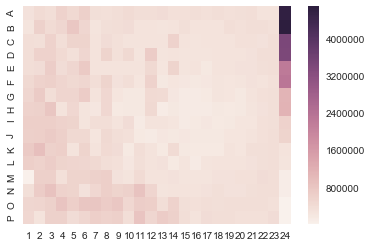

In [9]:
# Visualize the values of concentrations on the plate

sns.heatmap(fluorescence)

In [11]:
standards = [8, 8, 6, 6, 4, 4, 2, 2, 1, 1, 0.5, 0.5, 0.025, 0.025, 0, 0]
len(standards)

16

In [12]:
means = fluorescence[24].groupby(standards).mean()
means

0.000      12391.5
0.025     117317.5
0.500     272212.0
1.000     579970.0
2.000    1139346.0
4.000    2288211.0
6.000    3443645.0
8.000    4655978.0
Name: 24, dtype: float64

In [13]:
stds = fluorescence[24].groupby(standards).std()
stds

0.000      678.115403
0.025     1284.813021
0.500     9960.306120
1.000     2285.369117
2.000    12753.377905
4.000    45606.973173
6.000    11708.274083
8.000    55923.661110
Name: 24, dtype: float64

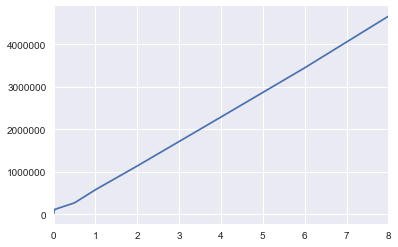

In [14]:
means.plot()

If you try to add a legend now, it won't have a name that makes sense

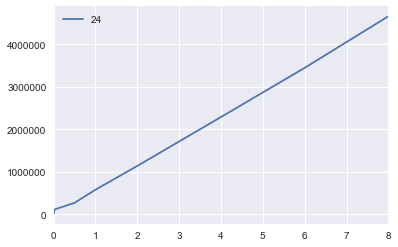

In [15]:
means.plot(legend=True)

In [16]:
means.name = 'Mean'

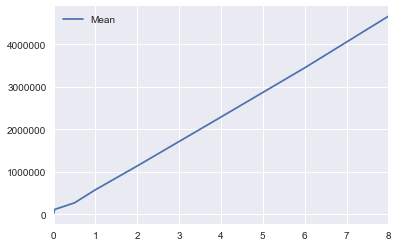

In [17]:
means.plot(legend=True)

In [18]:
from scipy.stats import linregress

Question for Ashley: Sometimes not all the concentrations are used .. how do you decide this?

In [20]:
concentrations_to_use = [6, 4, 2, 1, 0.5]

In [21]:
regressed = linregress(concentrations_to_use, means[concentrations_to_use])
regressed

LinregressResult(slope=574824.28846153861, intercept=-7348.7788461542223, rvalue=0.99998220251004977, pvalue=9.013030330840659e-08, stderr=1980.0431565254921)

In [22]:
y = pd.Series(regressed.slope * means.index + regressed.intercept, index=means.index, 
              name='Regression')
y

0.000   -7.348779e+03
0.025    7.021828e+03
0.500    2.800634e+05
1.000    5.674755e+05
2.000    1.142300e+06
4.000    2.291948e+06
6.000    3.441597e+06
8.000    4.591246e+06
Name: Regression, dtype: float64

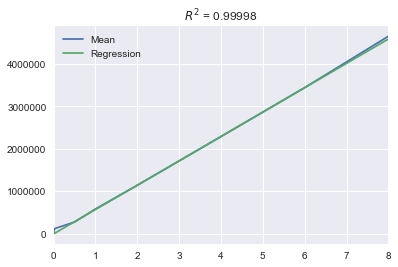

In [24]:
means.plot(legend=True)
y.plot(legend=True)

# :.5 indicates 5 decimal places
plt.title(f'$R^2$ = {regressed.rvalue:.5}')

plt.savefig(f'{sheetname}_regression.pdf')

In [25]:
ls

000_read_plate_concentrations.ipynb  MAA000459_regression.pdf
001_make_cherrypick_table.ipynb      template_regression.pdf
MAA000459_echo.csv


## Convert to concentration

In [27]:
concentrations = (fluorescence - regressed.intercept)/regressed.slope
concentrations

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,0.558033,0.738726,0.695967,1.023549,0.815536,1.094261,0.632485,0.582705,0.641483,0.744613,...,0.598530,0.646771,0.578263,0.640327,0.598671,0.607571,0.687448,0.540921,0.531699,8.043819
B,0.470274,1.067258,0.742359,0.918451,1.383563,0.915671,0.470884,0.625904,0.701160,0.709448,...,0.620140,0.506655,0.510919,0.515916,0.639969,0.600585,0.670065,0.679162,0.576757,8.181406
C,0.696604,0.622548,1.026219,0.683146,0.993117,1.016526,0.540789,0.713075,0.576842,0.479193,...,0.487632,0.460431,0.508405,0.492073,0.542541,0.576118,0.583432,0.552330,0.680688,6.017966
D,0.646075,1.051627,1.044804,0.784055,0.596431,0.914984,0.521035,0.986143,0.601891,0.848708,...,0.477737,0.475830,0.457228,0.540323,0.484609,0.531543,0.572340,0.638442,0.668785,5.989160
E,0.674352,0.729327,1.210319,0.730809,0.900075,1.309388,0.490864,0.523081,0.522592,0.488171,...,0.462894,0.535849,0.369556,0.479654,0.521482,0.559642,0.570395,0.614102,0.685021,3.937396
F,0.822555,1.024389,1.085387,0.939149,0.810854,0.895786,0.684809,0.963879,0.562024,0.644656,...,0.402213,0.359835,0.406854,0.451407,0.442385,0.460351,0.565795,0.509387,0.583277,4.049601
G,0.900908,1.258242,0.643012,0.949845,0.940844,1.219017,0.479492,0.861600,0.424011,0.365428,...,0.286863,0.280129,0.319502,0.450850,0.426914,0.357994,0.503362,0.581189,0.619892,1.979173
H,1.043444,1.055961,1.413341,0.522521,0.883468,0.455483,0.384002,0.888078,0.288253,0.380890,...,0.263981,0.265112,0.279038,0.329391,0.315153,0.347459,0.467659,0.555378,0.611927,2.010550
I,1.165378,1.177248,1.128031,1.024001,0.967528,0.472902,0.664312,0.663199,0.488930,0.713929,...,0.283819,0.311484,0.387642,0.315094,0.350818,0.422346,0.446002,0.600301,0.627670,1.024547
J,1.108761,1.122943,1.268906,1.097892,0.839621,0.844192,0.425681,0.797866,0.677250,0.575431,...,0.405033,0.346733,0.320106,0.353842,0.447248,0.446192,0.504775,0.598511,0.669404,1.018925


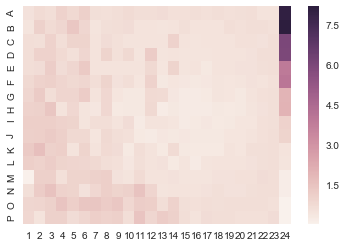

In [28]:
sns.heatmap(concentrations)

In [29]:
average_blanks = concentrations[23].mean()
std_blanks = concentrations[23].std()

In [30]:
avg_std = average_blanks + std_blanks
avg_std

0.69215786499025134

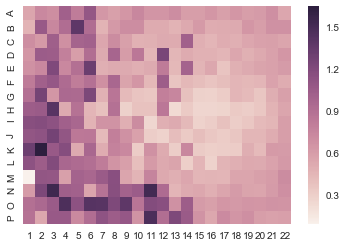

In [64]:
sns.heatmap(concentrations.loc[:, :22])

In [31]:
is_cell_good = concentrations > avg_std
is_cell_good

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,False,True,True,True,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
B,False,True,True,True,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
C,True,False,True,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
D,False,True,True,True,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
E,False,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
F,True,True,True,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
G,True,True,False,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
H,True,True,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
I,True,True,True,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
J,True,True,True,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


Get total number of good cells

In [32]:
is_cell_good.sum()#.sum()

1     10
2     14
3     15
4     13
5     14
6     13
7      5
8     11
9      5
10     6
11     4
12     8
13     3
14     5
15     0
16     0
17     1
18     0
19     0
20     0
21     0
22     1
23     1
24    10
dtype: int64

In [33]:
is_cell_good.sum().sum()

139

subset concentrations, taking only cells with high enough concentrations

In [34]:
good_cells = concentrations[is_cell_good]
good_cells

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,NaN,0.738726,0.695967,1.023549,0.815536,1.094261,NaN,NaN,NaN,0.744613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.043819
B,NaN,1.067258,0.742359,0.918451,1.383563,0.915671,NaN,NaN,0.701160,0.709448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.181406
C,0.696604,NaN,1.026219,NaN,0.993117,1.016526,NaN,0.713075,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.017966
D,NaN,1.051627,1.044804,0.784055,NaN,0.914984,NaN,0.986143,NaN,0.848708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.989160
E,NaN,0.729327,1.210319,0.730809,0.900075,1.309388,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.937396
F,0.822555,1.024389,1.085387,0.939149,0.810854,0.895786,NaN,0.963879,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.049601
G,0.900908,1.258242,NaN,0.949845,0.940844,1.219017,NaN,0.861600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.979173
H,1.043444,1.055961,1.413341,NaN,0.883468,NaN,NaN,0.888078,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.010550
I,1.165378,1.177248,1.128031,1.024001,0.967528,NaN,NaN,NaN,NaN,0.713929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.024547
J,1.108761,1.122943,1.268906,1.097892,0.839621,0.844192,NaN,0.797866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.018925


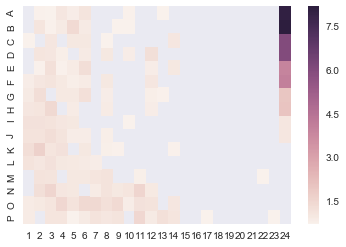

In [35]:
sns.heatmap(good_cells)

Only look at columns with cells (up to and including column 22)

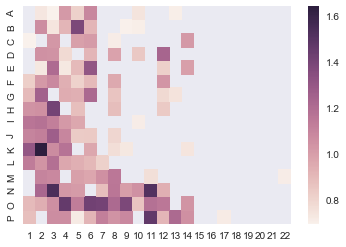

In [62]:
sns.heatmap(good_cells.loc[:, :22])

## Convert to ECHO pick list

.. lots of data reshaping and column adding

In [41]:
good_cells.unstack().head()

1  A         NaN
   B         NaN
   C    0.696604
   D         NaN
   E         NaN
dtype: float64

In [45]:
good_cells.unstack().reset_index().head()

,level_0,level_1,0
0,1,A,NaN
1,1,B,NaN
2,1,C,0.654058
3,1,D,NaN
4,1,E,NaN


In [42]:
good_cells.unstack().reset_index().dropna().head()

,level_0,level_1,0
2,1,C,0.696604
5,1,F,0.822555
6,1,G,0.900908
7,1,H,1.043444
8,1,I,1.165378


In [43]:
echo_picks = good_cells.unstack().reset_index().dropna()
echo_picks.head()

,level_0,level_1,0
2,1,C,0.696604
5,1,F,0.822555
6,1,G,0.900908
7,1,H,1.043444
8,1,I,1.165378


In [44]:
echo_picks = echo_picks.rename(
    columns={'level_0': 'column_number', 
             'level_1': 'row_letter', 
             0: 'concentration'})
echo_picks.head()

,column_number,row_letter,concentration
2,1,C,0.696604
5,1,F,0.822555
6,1,G,0.900908
7,1,H,1.043444
8,1,I,1.165378


In [50]:
echo_picks['well'] = echo_picks.apply(lambda x: '{row_letter}{column_number}'.format(**x), 
                                      axis=1)
echo_picks.head()

,column_number,row_letter,concentration,well
2,1,C,0.696604,C1
5,1,F,0.822555,F1
6,1,G,0.900908,G1
7,1,H,1.043444,H1
8,1,I,1.165378,I1


In [51]:
x = echo_picks.loc[2]
x

column_number           1
row_letter              C
concentration    0.696604
well                   C1
Name: 2, dtype: object

In [52]:
x.column_number

1

In [53]:
echo_picks['plate'] = plate_name
echo_picks.head()

,column_number,row_letter,concentration,well,plate
2,1,C,0.696604,C1,MAA000459
5,1,F,0.822555,F1,MAA000459
6,1,G,0.900908,G1,MAA000459
7,1,H,1.043444,H1,MAA000459
8,1,I,1.165378,I1,MAA000459


In [54]:
echo_picks['mouse_id'] = mouse_id
echo_picks.head()

,column_number,row_letter,concentration,well,plate,mouse_id
2,1,C,0.696604,C1,MAA000459,1_6_M
5,1,F,0.822555,F1,MAA000459,1_6_M
6,1,G,0.900908,G1,MAA000459,1_6_M
7,1,H,1.043444,H1,MAA000459,1_6_M
8,1,I,1.165378,I1,MAA000459,1_6_M


In [55]:
echo_picks['name'] = echo_picks.apply(lambda x: '{well}-{plate}-{mouse_id}-1'.format(**x), 
                                      axis=1)
echo_picks.head()

,column_number,row_letter,concentration,well,plate,mouse_id,name
2,1,C,0.696604,C1,MAA000459,1_6_M,C1-MAA000459-1_6_M-1
5,1,F,0.822555,F1,MAA000459,1_6_M,F1-MAA000459-1_6_M-1
6,1,G,0.900908,G1,MAA000459,1_6_M,G1-MAA000459-1_6_M-1
7,1,H,1.043444,H1,MAA000459,1_6_M,H1-MAA000459-1_6_M-1
8,1,I,1.165378,I1,MAA000459,1_6_M,I1-MAA000459-1_6_M-1


In [58]:
# index=False to not print the bold row numbers on the left
echo_picks.to_csv(f'{sheetname}_echo.csv', index=False)

In [59]:
! head $sheetname\_echo.csv

column_number,row_letter,concentration,well,plate,mouse_id,name
1,C,0.6966037916001292,C1,MAA000459,1_6_M,C1-MAA000459-1_6_M-1
1,F,0.8225553240132282,F1,MAA000459,1_6_M,F1-MAA000459-1_6_M-1
1,G,0.9009079630788851,G1,MAA000459,1_6_M,G1-MAA000459-1_6_M-1
1,H,1.0434436938137253,H1,MAA000459,1_6_M,H1-MAA000459-1_6_M-1
1,I,1.1653783465535943,I1,MAA000459,1_6_M,I1-MAA000459-1_6_M-1
1,J,1.1087610451394465,J1,MAA000459,1_6_M,J1-MAA000459-1_6_M-1
1,K,1.3065954134546067,K1,MAA000459,1_6_M,K1-MAA000459-1_6_M-1
1,L,1.136731331577814,L1,MAA000459,1_6_M,L1-MAA000459-1_6_M-1
1,O,0.8984289446577709,O1,MAA000459,1_6_M,O1-MAA000459-1_6_M-1


## Make a function that outputs the echo pick list